In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv("C:/Users/Administrator/Downloads/housing_data.csv")

In [3]:
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [4]:
housing_data.drop('Unnamed: 0', axis = 1, inplace = True)

## Is there any missing values

In [6]:
housing_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [7]:
housing_data.shape

(1460, 80)

In [8]:
housing_data.isnull().sum() > 0

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
housing_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [11]:
housing_data['Alley'].mode()


0    Grvl
Name: Alley, dtype: object

In [12]:
housing_data['Alley'].fillna('Grvl',inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8560\2179388810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['Alley'].fillna('Grvl',inplace = True)


## Univariate Analysis
    * Simplest form of analysis
    * Only one variable is used for visualisation . This  doesnt deal with relationship plots. 
    * It takes data, summarize the data, pattern analysis, trend analysis in data.
    * Can be implemented on 'numerical' or categorical' data.

In [14]:
df_numerical = housing_data.select_dtypes(include=['number'])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [15]:
df_categorical = housing_data.select_dtypes(include=['O'])
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     588 non-null 

##  Line Plot
    * Univariate Data - Trend Analysis
    * Bivariate Data - Relationship Plots 

<Axes: >

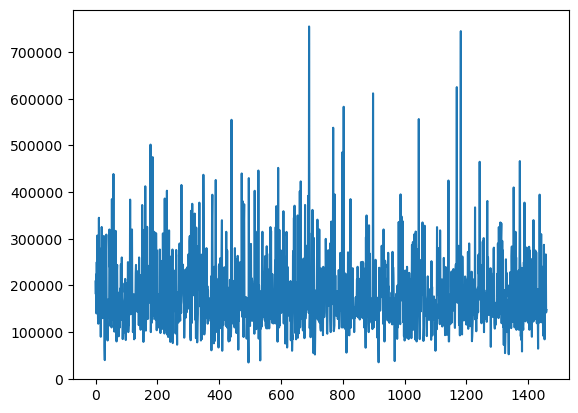

In [17]:
# Plot using Dataframe and plot type = 'line'
df_numerical['SalePrice'].plot(kind = 'line')

In [18]:
df_numerical['SalePrice'].sort_values(ascending = True).unique()

array([ 34900,  35311,  37900,  39300,  40000,  52000,  52500,  55000,
        55993,  58500,  60000,  61000,  62383,  64500,  66500,  67000,
        68400,  68500,  72500,  73000,  75000,  75500,  76000,  76500,
        78000,  79000,  79500,  79900,  80000,  80500,  81000,  82000,
        82500,  83000,  83500,  84000,  84500,  84900,  85000,  85400,
        85500,  86000,  87000,  87500,  88000,  89000,  89471,  89500,
        90000,  90350,  91000,  91300,  91500,  92000,  92900,  93000,
        93500,  94000,  94500,  94750,  95000,  96500,  97000,  97500,
        98000,  98300,  98600,  99500,  99900, 100000, 101000, 101800,
       102000, 102776, 103000, 103200, 103600, 104000, 104900, 105000,
       105500, 105900, 106000, 106250, 106500, 107000, 107400, 107500,
       107900, 108000, 108480, 108500, 108959, 109000, 109008, 109500,
       109900, 110000, 110500, 111000, 111250, 112000, 112500, 113000,
       114500, 114504, 115000, 116000, 116050, 116500, 116900, 117000,
      

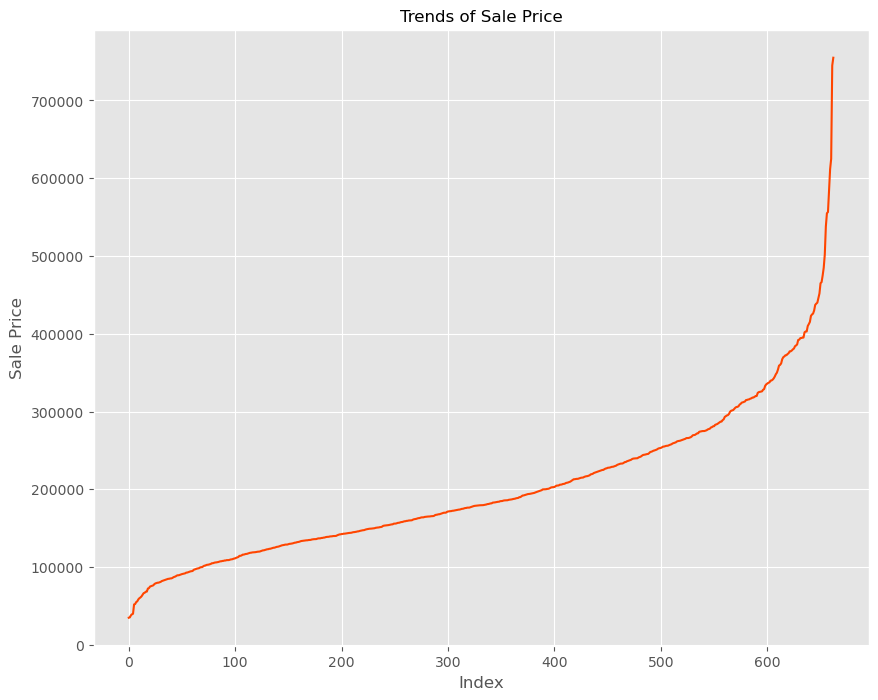

In [19]:

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(df_numerical['SalePrice'].sort_values(ascending = True).unique(), color = 'orangered')
plt.xlabel('Index')
plt.ylabel('Sale Price')
# size = set the font size for Title and labels
plt.title('Trends of Sale Price', size = 12)
plt.show()

## Bar Plot
    * Univariate or Bivariate Plots
    * Bar chart are used with categorical datasets.
    * Bar plots are used to display counts of unique value for categorical type , height of bar indicate count for each categorical value.

In [21]:
df_categorical['MoSold'].value_counts()

MoSold
Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: count, dtype: int64

<Axes: xlabel='MoSold'>

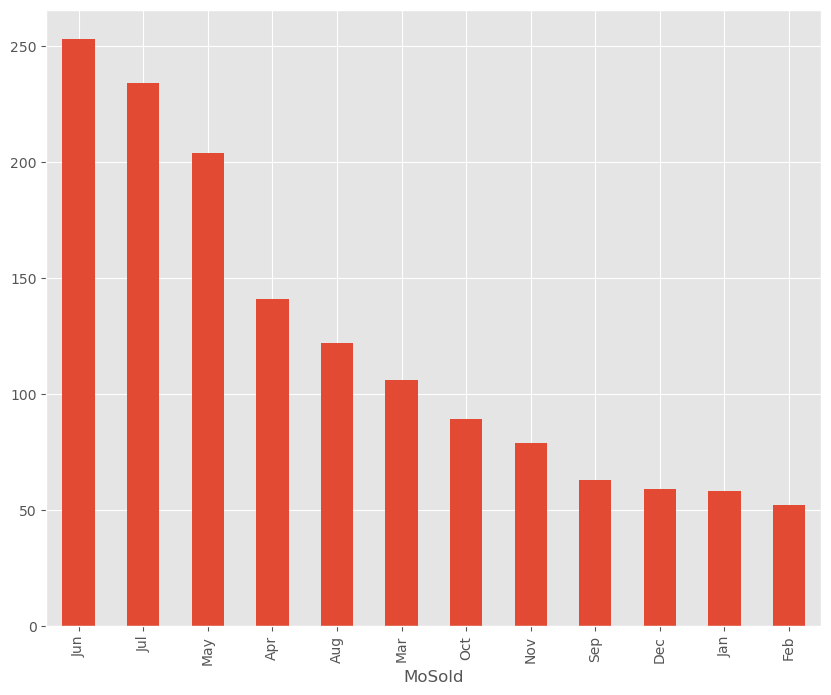

In [22]:
df_categorical['MoSold'].value_counts().plot(kind = 'bar', figsize = (10,8))


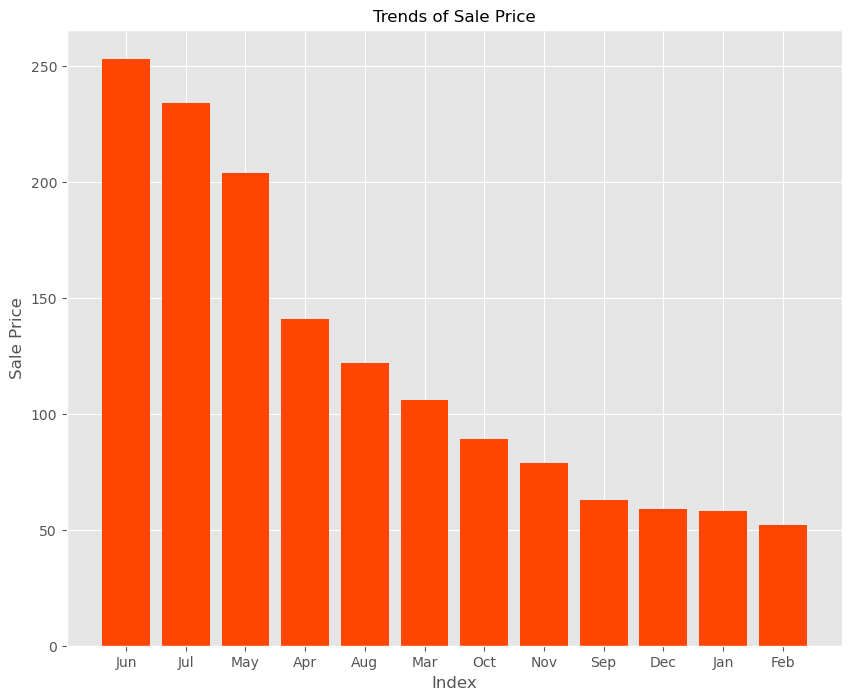

In [23]:

plt.figure(figsize = (10,8))
plt.bar(df_categorical['MoSold'].value_counts().index,  # array like 
        height = df_categorical['MoSold'].value_counts().values, color = 'orangered')  # values = array of values
plt.xlabel('Index')
plt.ylabel('Sale Price')
# size = set the font size for Title and labels
plt.title('Trends of Sale Price', size = 12)
plt.show()

## Histogram 
    * univariate - applied on continuous data
    * Used for analysis of frquency of data in range
    * used majorly for study of spread / data  distribution

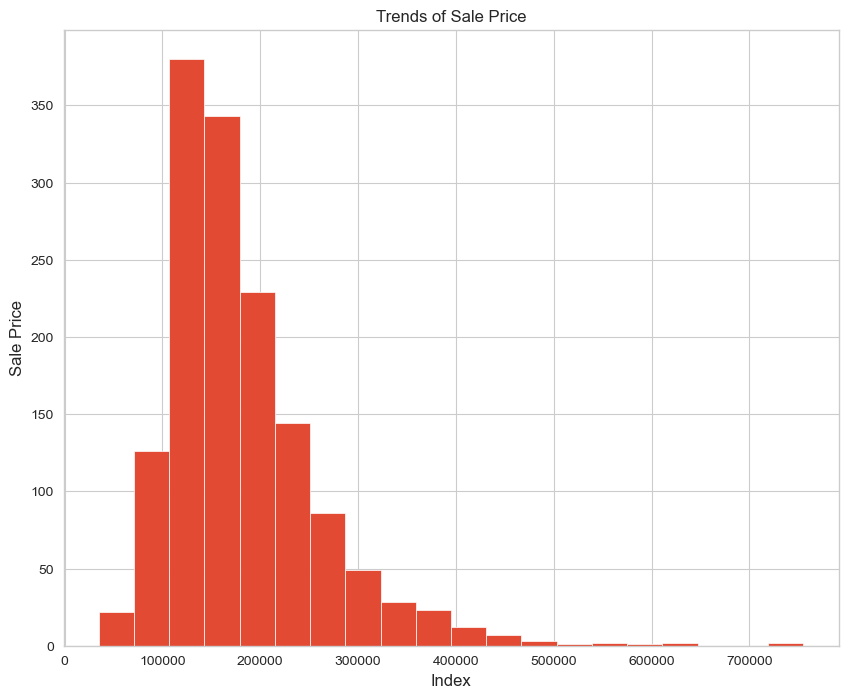

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
# bins = 20 indicates 20 equal distribution of numerical data
plt.hist(df_numerical['SalePrice'], bins = 20)
plt.xlabel('Index')
plt.ylabel('Sale Price')
# size = set the font size for Title and labels
plt.title('Trends of Sale Price', size = 12)
plt.show()

## Subplots
    * one plot will be split into many plots
    * each index position will be occupied by one plot

In [27]:
df_categorical['LandSlope'].unique()


array(['Gtl', 'Mod', 'Sev'], dtype=object)

(array([1., 0., 1., 2., 1., 2., 0., 0., 2., 1., 1., 1., 0., 0., 1.]),
 array([ 61000.        ,  81933.33333333, 102866.66666667, 123800.        ,
        144733.33333333, 165666.66666667, 186600.        , 207533.33333333,
        228466.66666667, 249400.        , 270333.33333333, 291266.66666667,
        312200.        , 333133.33333333, 354066.66666667, 375000.        ]),
 <BarContainer object of 15 artists>)

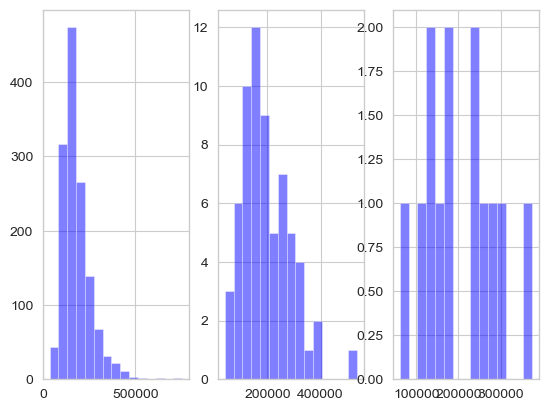

In [28]:
plt.subplot(1,3,1)
plt.hist(housing_data[housing_data['LandSlope'] == 'Gtl']['SalePrice'], bins=15, color='b', alpha=0.5)
plt.subplot(1,3,2)
plt.hist(housing_data[housing_data['LandSlope'] == 'Mod']['SalePrice'], bins=15, color='b', alpha=0.5)
plt.subplot(1,3,3)
plt.hist(housing_data[housing_data['LandSlope'] == 'Sev']['SalePrice'], bins=15, color='b', alpha=0.5)

## Scatter Plot

* Indicates relationship plot/ correlation between two plots

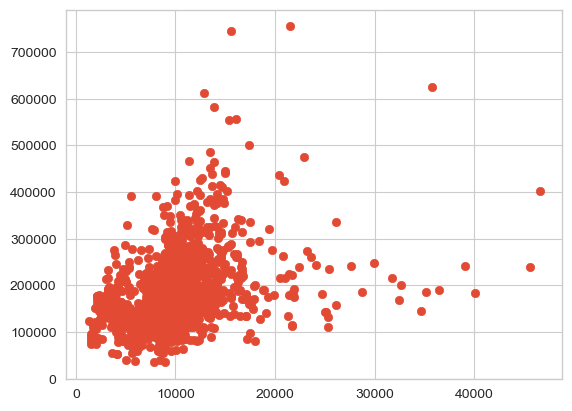

In [30]:
plt.scatter(df_numerical[df_numerical['LotArea'] < 50000]['LotArea'],
            df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'])
            

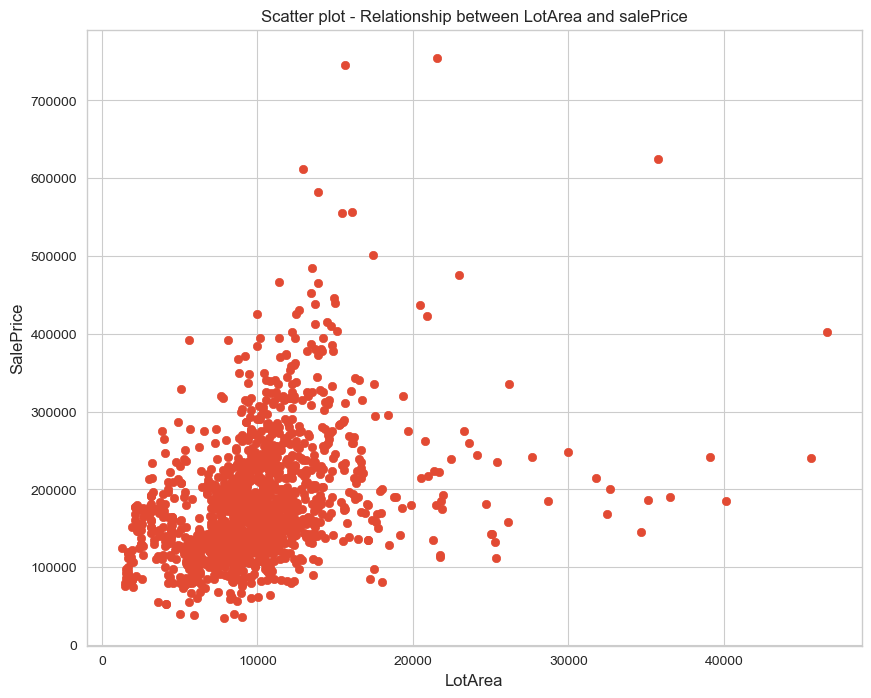

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(x=df_numerical[df_numerical['LotArea'] < 50000]['LotArea'],
            y=df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot - Relationship between LotArea and salePrice', size = 12)
plt.show()

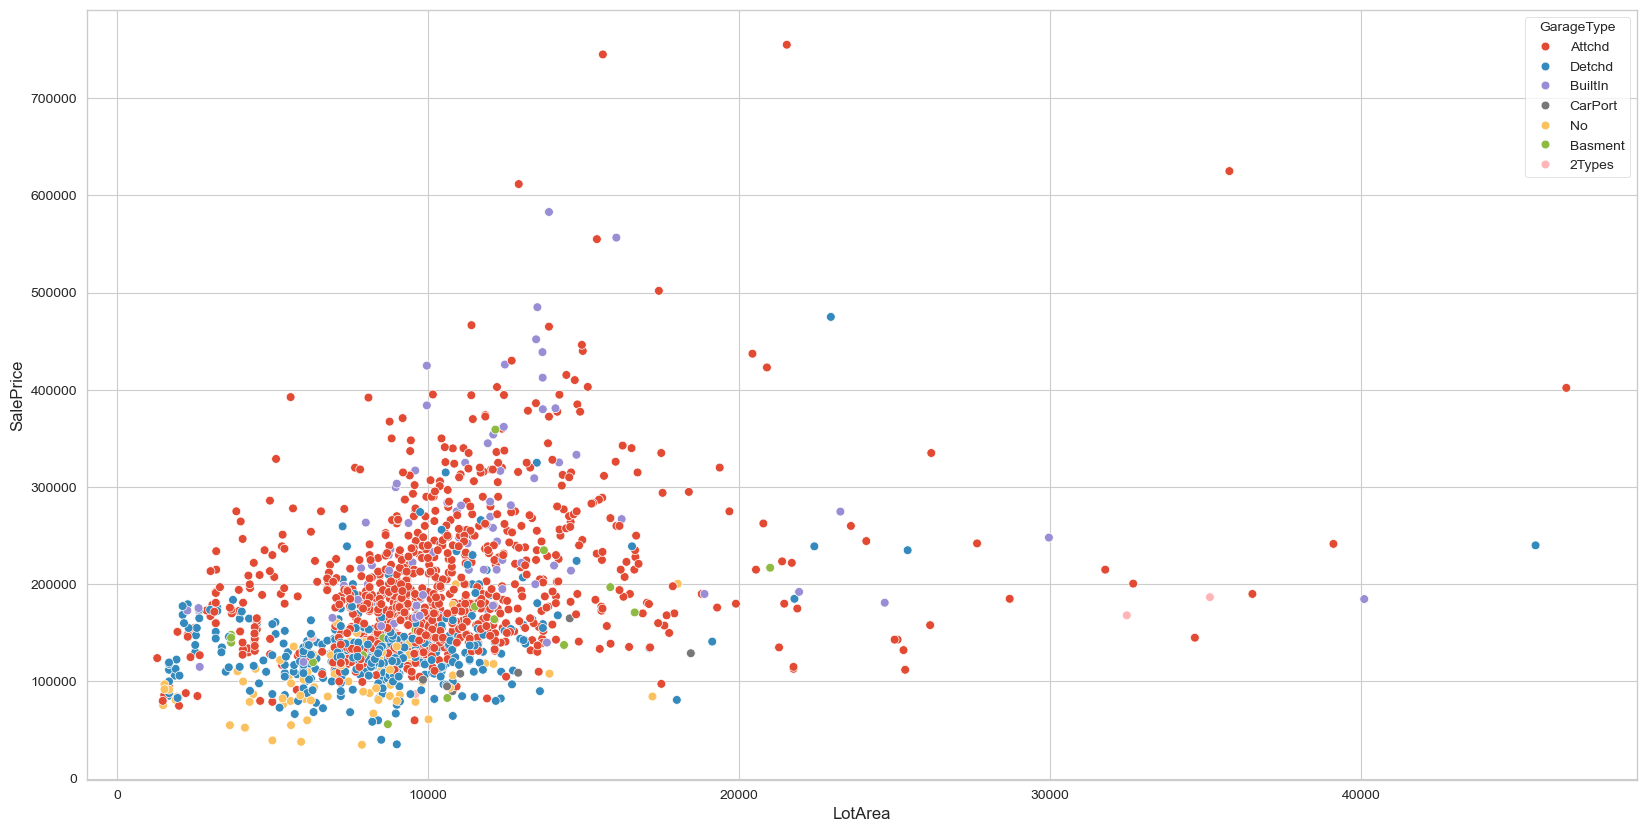

In [32]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=df_numerical[df_numerical['LotArea'] < 50000]['LotArea'],
            y=df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'], hue = df_categorical['GarageType'], s= 40 )
plt.show()

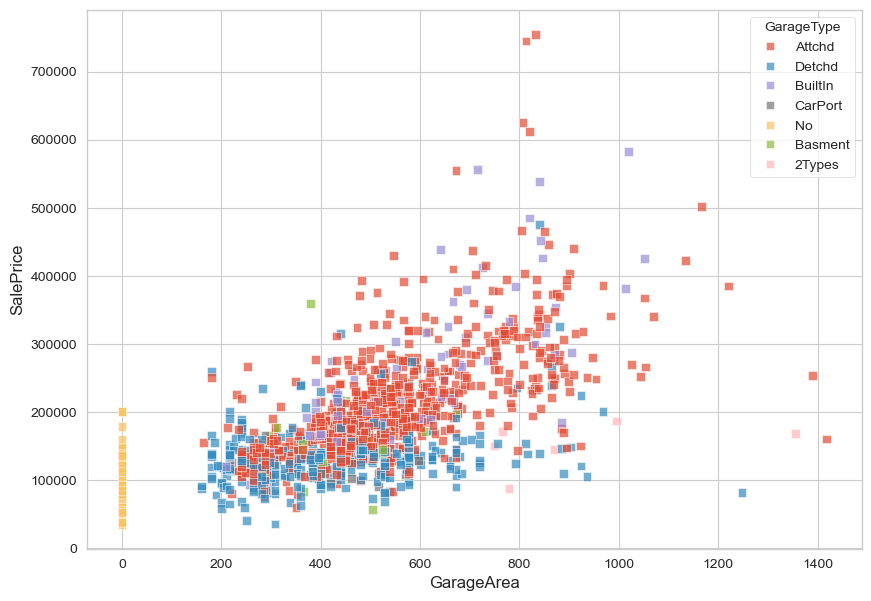

In [33]:
plt.figure(figsize = (10,7))
# s = size of bubble, marker = 's' , '^','<','*', 'd','o'
sns.scatterplot(x=df_numerical['GarageArea'] ,
            y=df_numerical['SalePrice'], hue = df_categorical['GarageType'], s= 40 , marker = 's',alpha = 0.7 )
plt.show()

In [34]:
df_numerical

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


## Pie Chart
    * Frequency Distribution plot

In [36]:
df_categorical['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

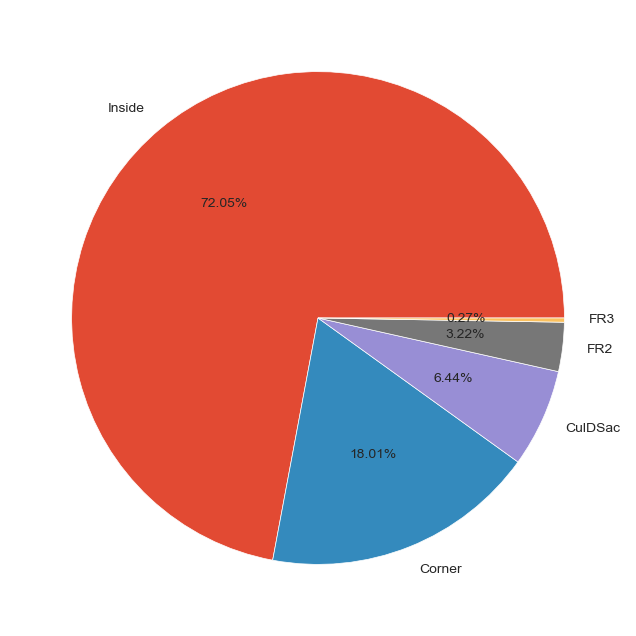

In [134]:
plt.figure(figsize = (8,8))
plt.pie(df_categorical['LotConfig'].value_counts(), autopct = '%0.2f%%', labels = ['Inside', 'Corner','CulDSac', 'FR2','FR3'])
plt.legend(loc = 1)
plt.show()

##  Kernel Density Estimator (KDE)
* Shows Histogram + density plot
* to display distribution of numerical continuous data

<Axes: xlabel='GarageArea', ylabel='Density'>

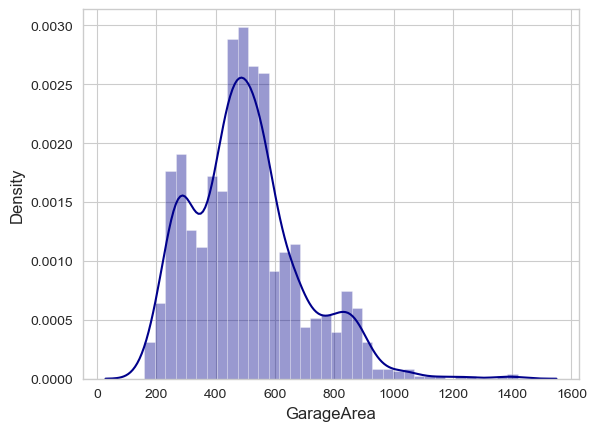

In [39]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color = 'darkblue')

<Axes: xlabel='GarageArea', ylabel='Density'>

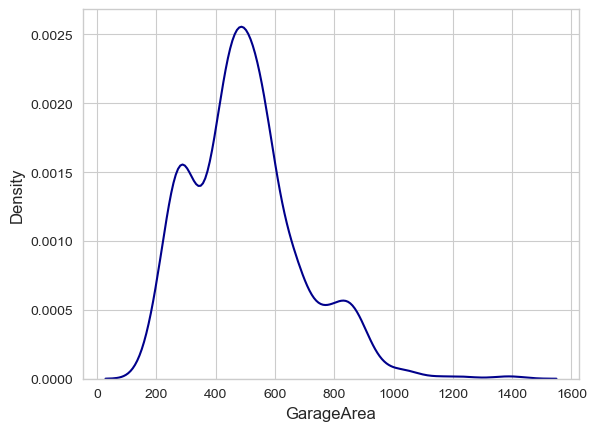

In [40]:

sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color = 'darkblue', hist = False)

## Box Plot 

<Axes: xlabel='GarageArea'>

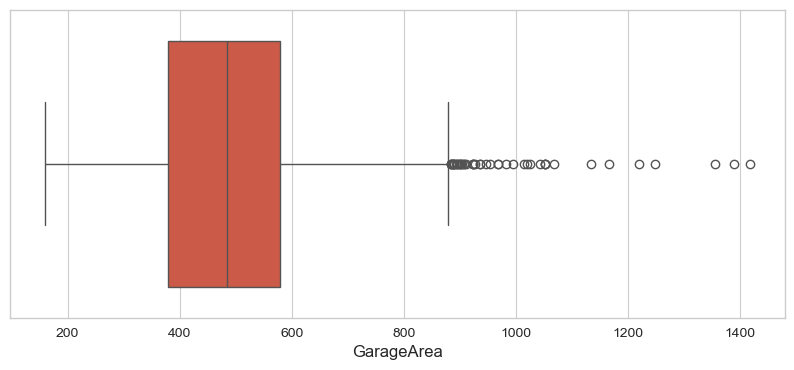

In [78]:
plt.figure(figsize = (10,4))
sns.boxplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], orient = 'h')

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

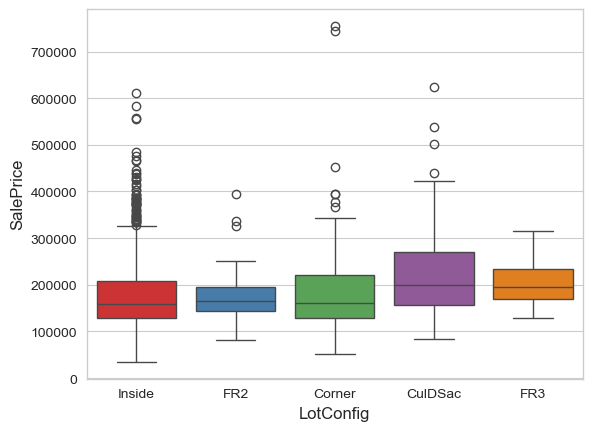

In [103]:
sns.boxplot(x= 'LotConfig', y = 'SalePrice', data = housing_data, hue = 'LotConfig' , palette = 'Set1', color = 'm')

## Violin Plot
    Multivariate plot
    KDE + box plot

<Axes: ylabel='GarageArea'>

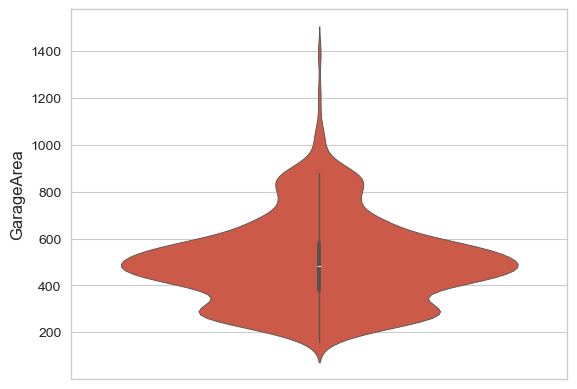

In [82]:
sns.violinplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'])

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

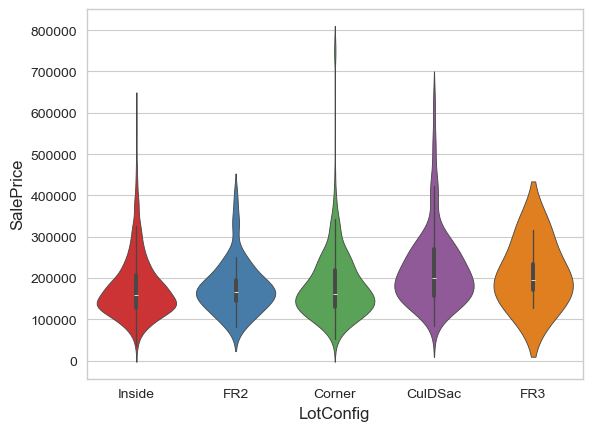

In [101]:
sns.violinplot(x= 'LotConfig', y = 'SalePrice', data = housing_data, hue = 'LotConfig' , palette = 'Set1')


## Heat Map - Multivariate Plot

In [111]:
df_numerical.corr()[['SalePrice']]

,SalePrice
LotFrontage,0.209624
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479


<Axes: >

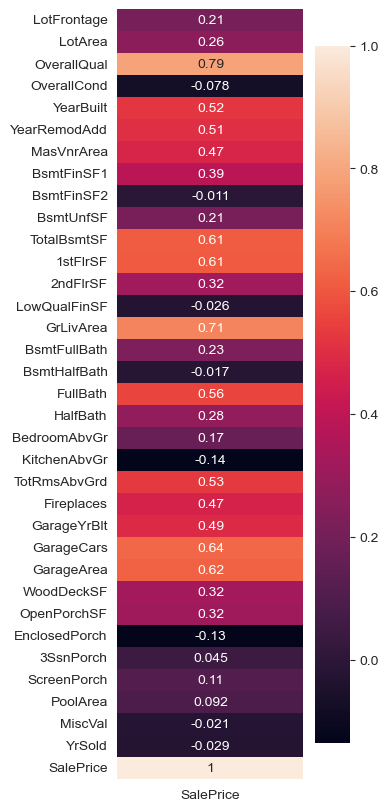

In [119]:
plt.figure(figsize = (3,10))
sns.heatmap(df_numerical.corr()[['SalePrice']], annot = True)

<Axes: >

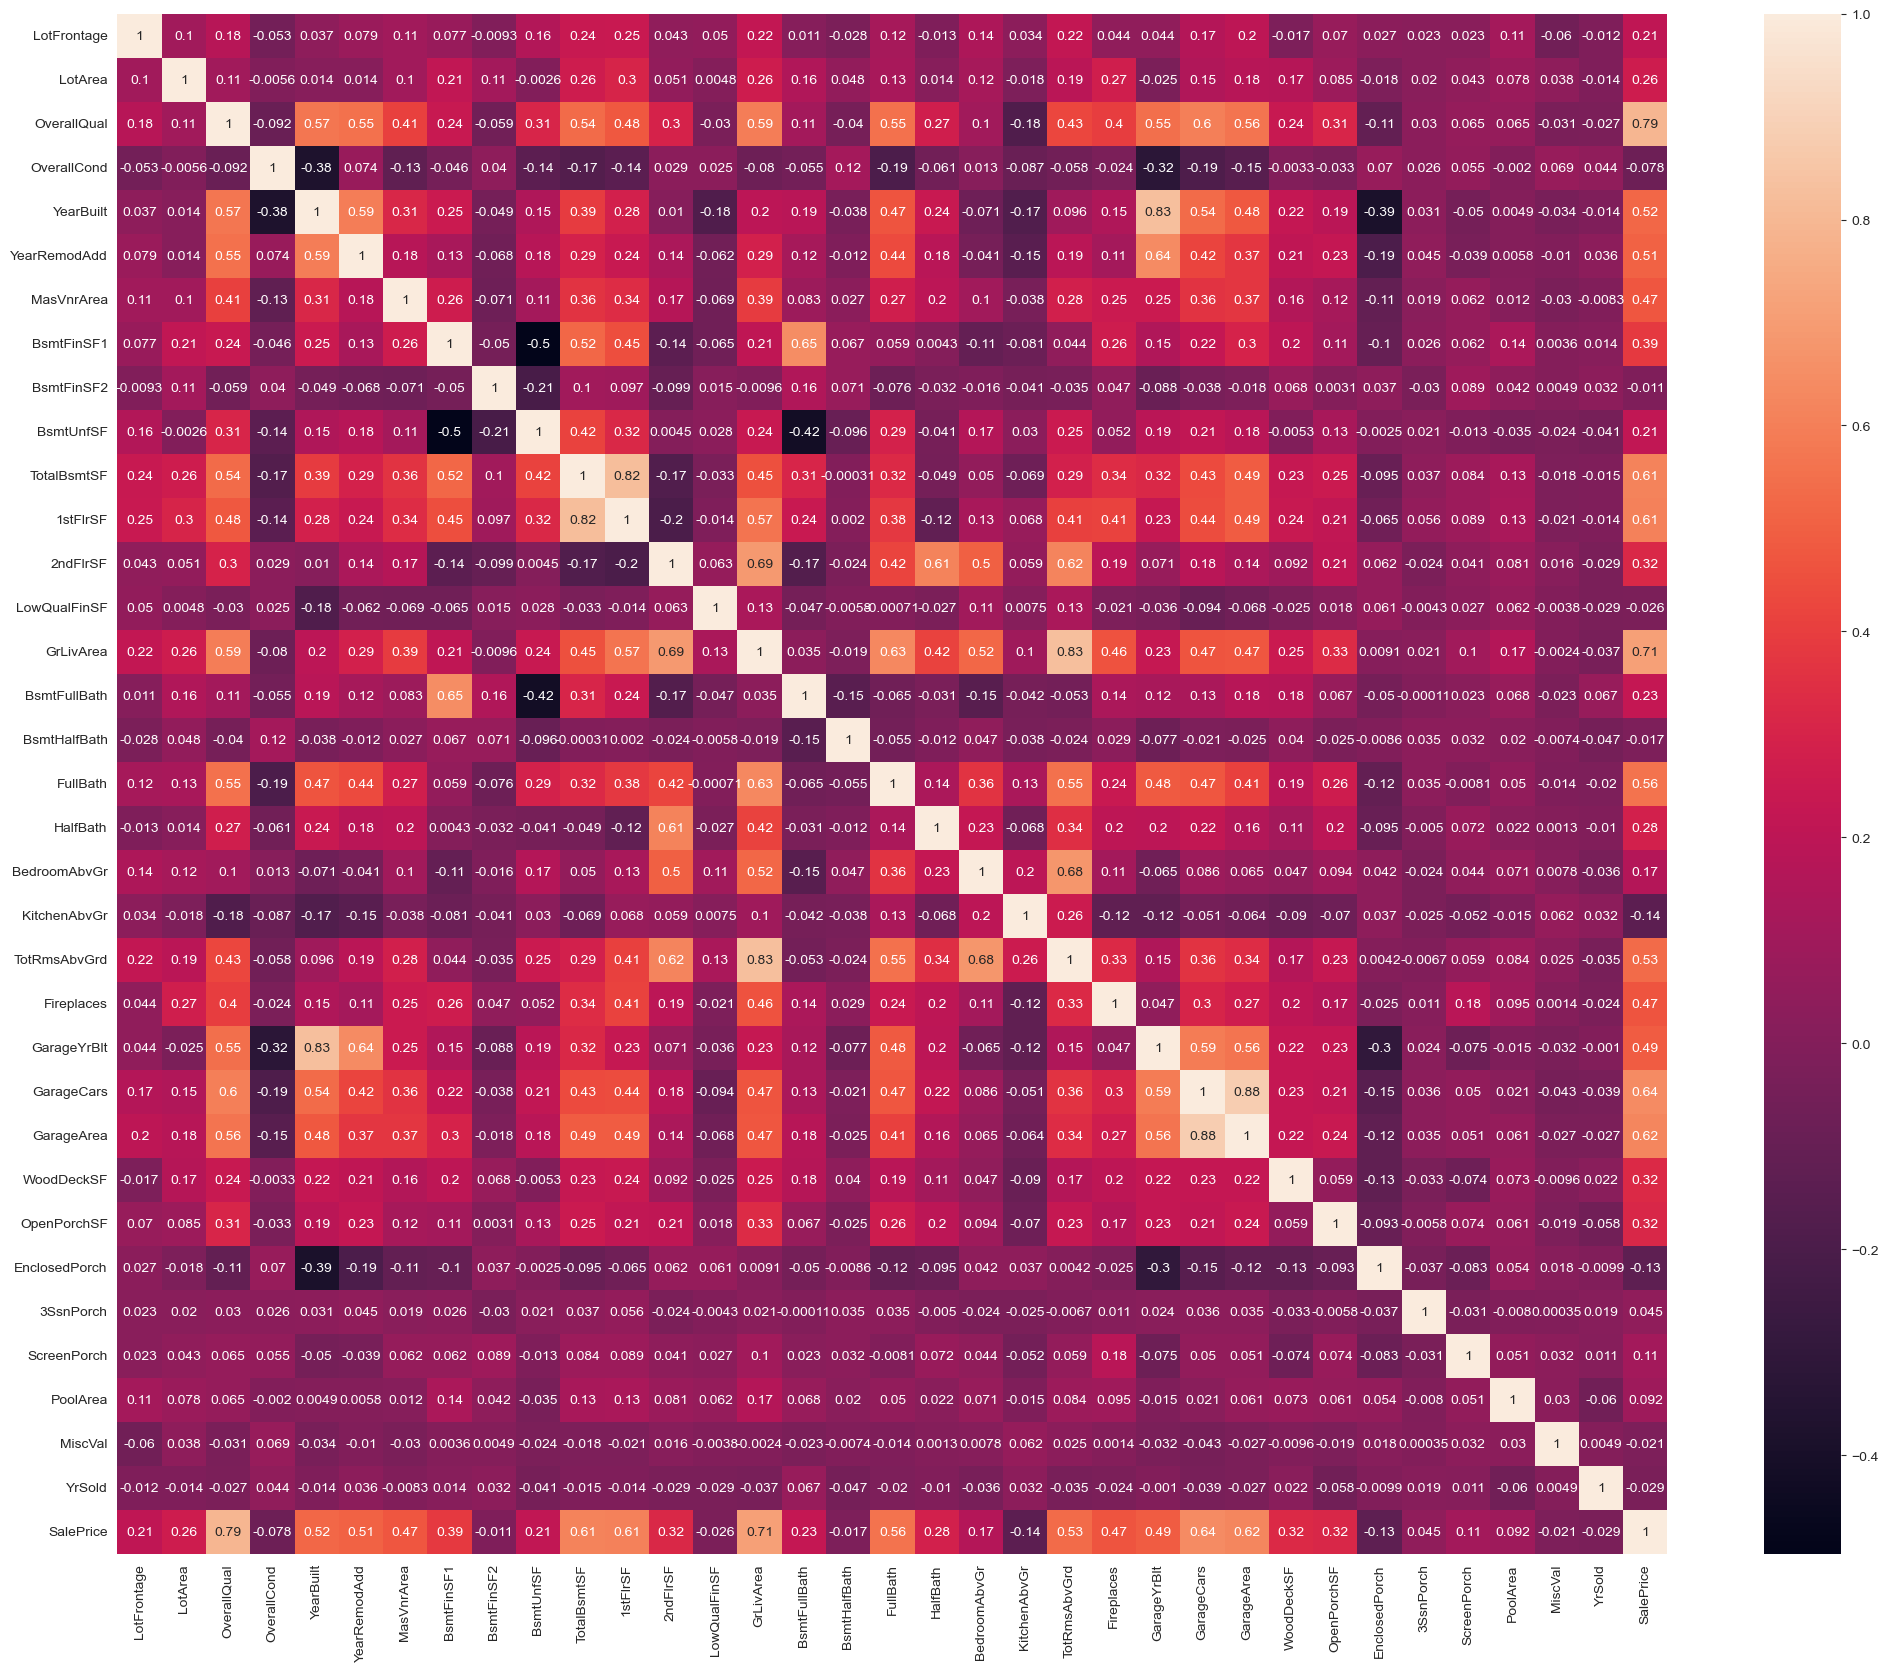

In [123]:
plt.figure(figsize = (25,20))
sns.heatmap(df_numerical.corr(), annot = True)

## Area Plot


<Axes: >

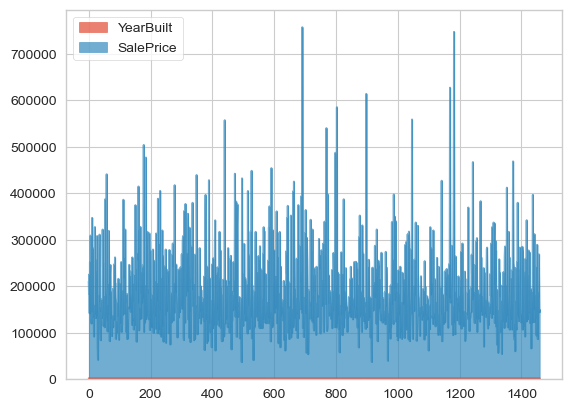

In [130]:
housing_data[['YearBuilt','SalePrice']].plot(kind = 'area', stacked = True, alpha = 0.7)

<Axes: >

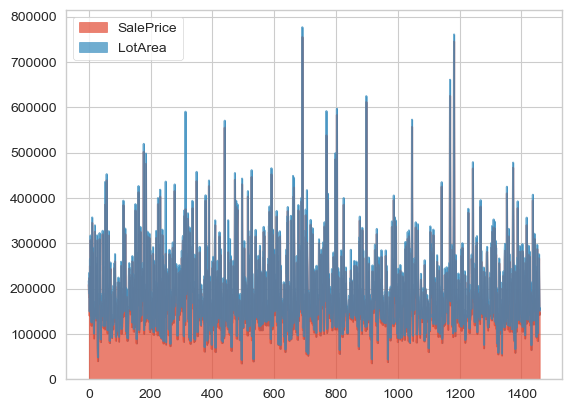

In [132]:
housing_data[['SalePrice', 'LotArea']].plot(kind = 'area', stacked = True, alpha = 0.7)
